# reading HDF5 data file and understanding the dataset structure

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
path = '/home/suraj/Data/Duke_WLOA_RL_Annotated/Duke_WLOA_Control.h5'

In [3]:
f = h5py.File(path, 'r')
f.keys()

<KeysViewHDF5 ['images', 'layer_maps', 'layer_names', 'patient_indices', 'splits']>

In [7]:
images = f['images']
layers = f['layer_maps']
splits = f['splits']
images, layers, splits

(<HDF5 dataset "images": shape (5088, 512, 1000), type "<f4">,
 <HDF5 dataset "layer_maps": shape (5088, 1000, 3), type "<f4">,
 <HDF5 group "/splits" (3 members)>)

In [5]:
print(type(images))

<class 'h5py._hl.dataset.Dataset'>


In [10]:
image = images[1, :, :,]
print(image)

[[0.7764706  0.7921569  0.8        ... 0.61960787 0.57254905 0.6313726 ]
 [0.7058824  0.69411767 0.7058824  ... 0.4392157  0.42745098 0.4745098 ]
 [0.5647059  0.5647059  0.5568628  ... 0.29803923 0.07843138 0.3137255 ]
 ...
 [0.12941177 0.23529412 0.23137255 ... 0.29411766 0.         0.16470589]
 [0.10196079 0.3019608  0.3372549  ... 0.29803923 0.         0.19215687]
 [0.05882353 0.19215687 0.         ... 0.08627451 0.         0.11764706]]


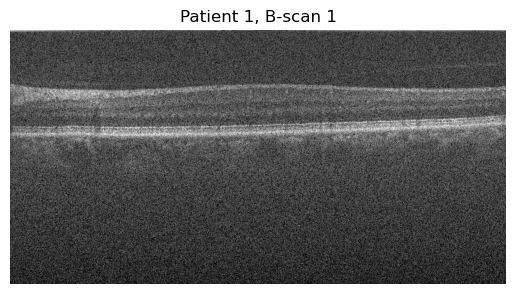

In [11]:
plt.imshow(image, cmap='gray')
plt.title('Patient 1, B-scan 1')
plt.axis('off')
plt.show()

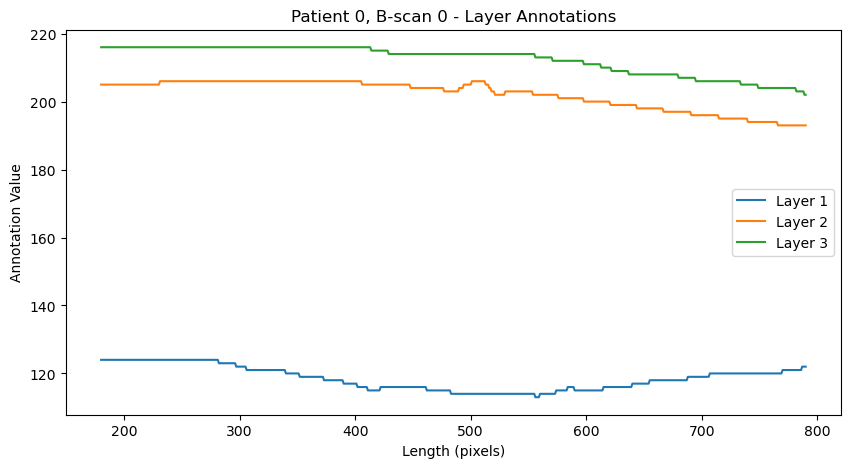

In [13]:
patient_idx = 0      # Change as needed
bscan_idx = 0        # Change as needed

layer_map = layers[patient_idx, :, :]  # shape: (1000, 3)

plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot(layer_map[:, i], label=f'Layer {i+1}')
plt.title(f'Patient {patient_idx}, B-scan {bscan_idx} - Layer Annotations')
plt.xlabel('Length (pixels)')
plt.ylabel('Annotation Value')
plt.legend()
plt.show()

In [14]:
print("Min:", np.nanmin(layer_map), "Max:", np.nanmax(layer_map))
print("Unique values:", np.unique(layer_map))
print("Any NaNs?", np.isnan(layer_map).any())
print("Shape:", layer_map.shape)

Min: 113.0 Max: 216.0
Unique values: [113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 193. 194.
 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208.
 209. 210. 211. 212. 213. 214. 215. 216.  nan]
Any NaNs? True
Shape: (1000, 3)


In [16]:
def plot_bscan_with_layers(idx):
    """Plot B-scan with layer annotations"""
    # Get data
    image = f['images'][idx]
    layers = f['layer_maps'][idx]
    
    # Create figure
    plt.figure(figsize=(15, 5))
    
    # Plot B-scan
    plt.imshow(image, cmap='gray', aspect='auto')
    
    # Plot layer annotations
    x_coords = np.arange(1000)
    colors = ['red', 'green', 'blue']
    layer_names = [name.decode() for name in f['layer_names']]
    
    for i, (color, name) in enumerate(zip(colors, layer_names)):
        plt.plot(x_coords, layers[:, i], color=color, label=name, linewidth=1)
    
    plt.title(f'B-scan {idx} with Layer Annotations')
    plt.legend(loc='upper right')
    plt.axis('on')
    plt.tight_layout()
    plt.show()

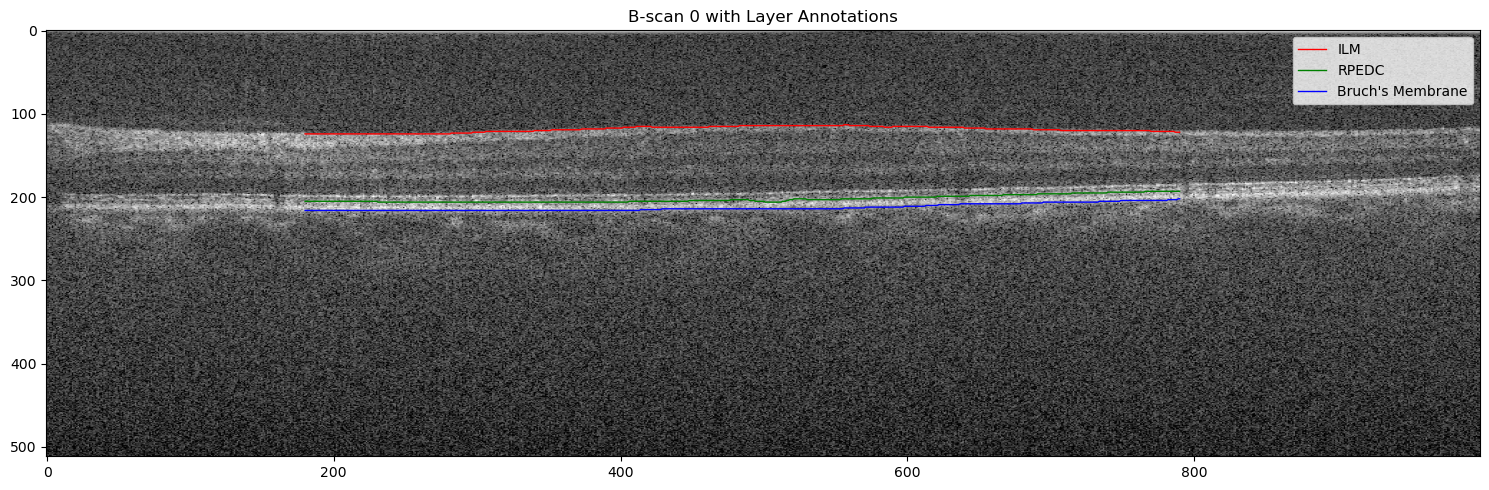

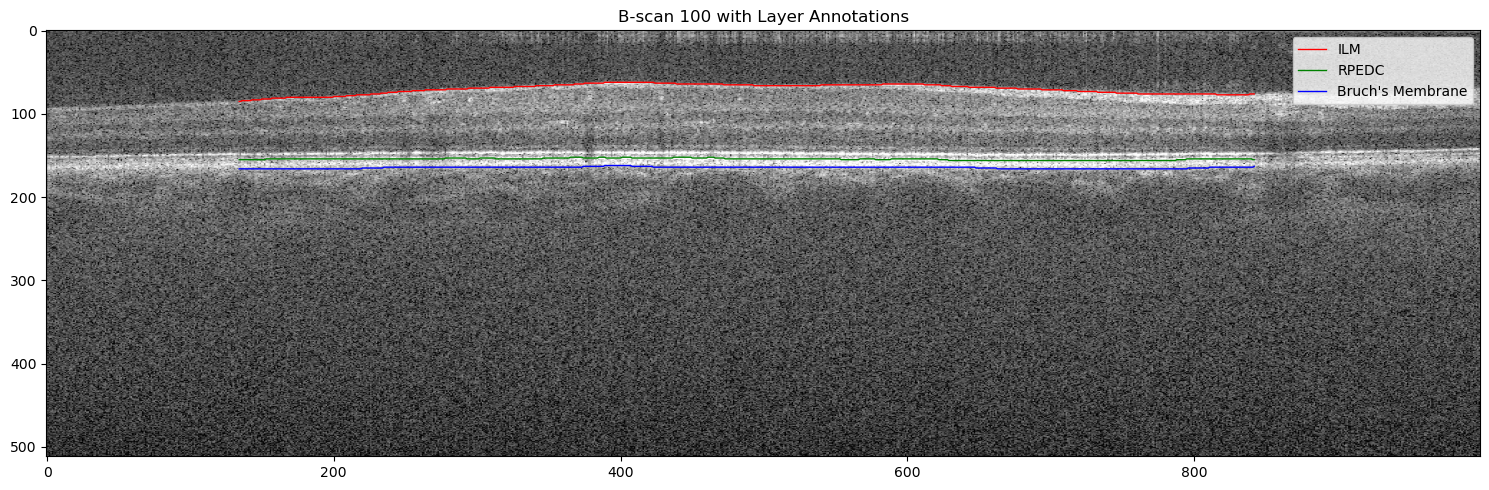

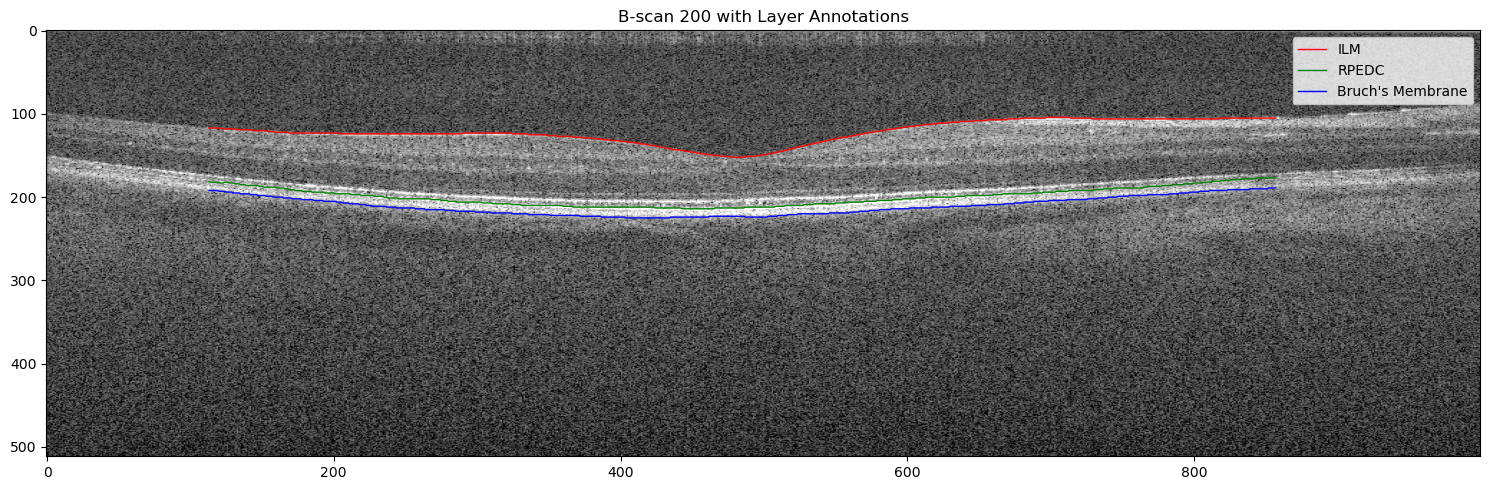

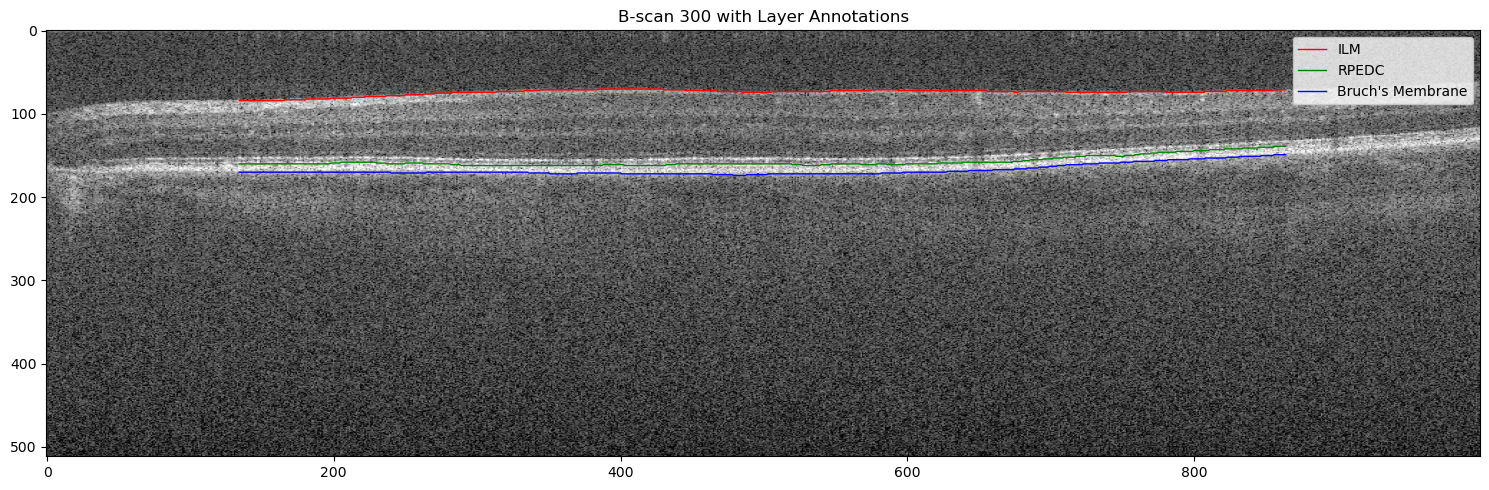

In [17]:
# Visualize a few examples
example_indices = [0, 100, 200, 300]
for idx in example_indices:
    plot_bscan_with_layers(idx)